## LIbraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from gensim import corpora, models
from gensim.models import CoherenceModel
import nltk
import pyLDAvis
import pyLDAvis.gensim_models

In [99]:
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')
df.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [100]:
df['Review_Text'].values[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [101]:
print(df.shape)

(42656, 6)


In [102]:
df['Rating'].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

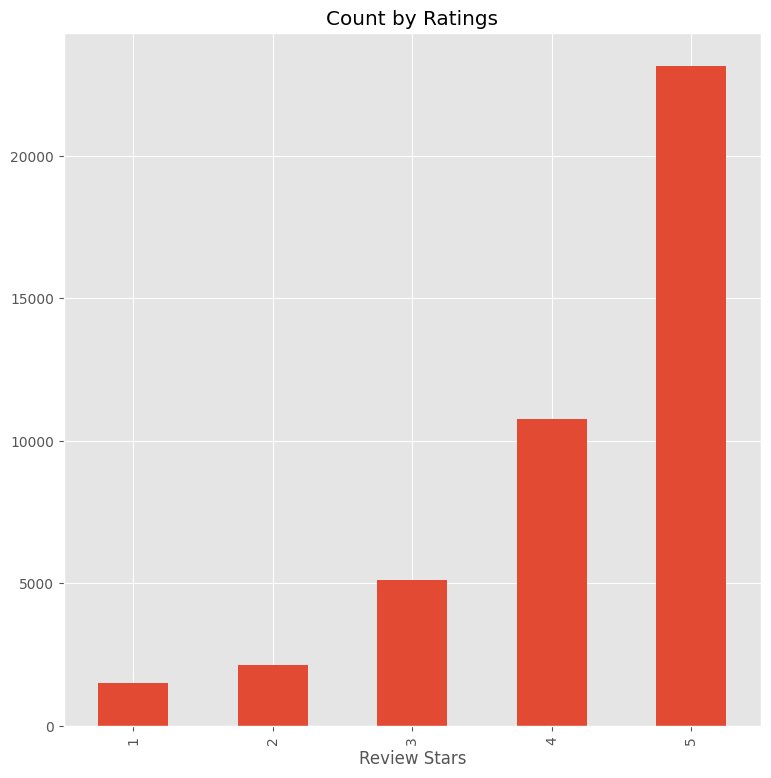

In [103]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count by Ratings', figsize = (9,9))
ax.set_xlabel('Review Stars')
plt.show()

In [104]:
test = df['Review_Text'][0]
test

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

## Gensim

In [105]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [106]:
doc_sample = df['Review_Text'][0]

print('original text: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized text: ')
print(preprocess(doc_sample))

original text: 
['If', "you've", 'ever', 'been', 'to', 'Disneyland', 'anywhere', "you'll", 'find', 'Disneyland', 'Hong', 'Kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street!', 'It', 'has', 'a', 'very', 'familiar', 'feel.', 'One', 'of', 'the', 'rides', '', 'its', 'a', 'Small', 'World', '', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing.', 'The', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well.', '']


 tokenized and lemmatized text: 
['disneyland', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'rid', 'small', 'world', 'absolut', 'fabul', 'worth', 'visit', 'fair', 'relat', 'busi', 'queue', 'move', 'fair']


In [107]:
processed_text = df['Review_Text'].map(preprocess)

In [183]:
processed_text[:10]

0    [disneyland, disneyland, hong, kong, similar, ...
1    [time, visit, disneyland, time, stay, tomorrow...
2    [thank, wasn, humid, visit, park, issu, shade,...
3    [disneyland, great, compact, park, unfortun, m...
4    [locat, citi, take, hour, kowlon, kid, like, d...
5    [disney, world, disneyland, anaheim, tokyo, di...
6    [great, place, know, obvious, go, daughter, ab...
7    [think, intro, disney, magic, littl, one, attr...
8    [feel, place, disneyland, train, fantast, past...
9    [talk, disneyland, disneyland, childhood, drea...
Name: Review_Text, dtype: object

### Bag of Words

In [109]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [110]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 absolut
1 busi
2 disneyland
3 fabul
4 fair
5 familiar
6 feel
7 hong
8 kong
9 layout
10 main


In [111]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text]
bow_corpus[10]

[(2, 3),
 (7, 1),
 (8, 1),
 (85, 1),
 (204, 1),
 (234, 1),
 (267, 1),
 (268, 1),
 (269, 1),
 (270, 1),
 (271, 1)]

In [112]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [113]:
dic2=dictionary[bow_doc_10[1][0]]
dic2

'hong'

In [114]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text]
bow_corpus[10]

[(2, 3),
 (7, 1),
 (8, 1),
 (82, 1),
 (199, 1),
 (228, 1),
 (258, 1),
 (259, 1),
 (260, 1),
 (261, 1)]

In [178]:

df['Review_Text'][0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [115]:
bow_doc_10 = bow_corpus[10]

for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                                     dictionary[bow_doc_10[i][0]], 
                                                     bow_doc_10[i][1]))

Word 2 ("disneyland") appears 3 time.
Word 7 ("hong") appears 1 time.
Word 8 ("kong") appears 1 time.
Word 82 ("amaz") appears 1 time.
Word 199 ("think") appears 1 time.
Word 228 ("come") appears 1 time.
Word 258 ("ceas") appears 1 time.
Word 259 ("exhaust") appears 1 time.
Word 260 ("florida") appears 1 time.
Word 261 ("nope") appears 1 time.


### TF-IDF

In [116]:
tfidf = models.TfidfModel(bow_corpus)

In [117]:
corpus_tfidf = tfidf[bow_corpus]

In [118]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.19096433934580137),
 (1, 0.14921483669624022),
 (2, 0.09421402310012578),
 (3, 0.2607114594663935),
 (4, 0.47984150109555834),
 (5, 0.3359618991240341),
 (6, 0.15162279998528513),
 (7, 0.17682820352915318),
 (8, 0.17677767388255425),
 (9, 0.33629366157477114),
 (10, 0.14849116120893346),
 (11, 0.24315717646088447),
 (12, 0.10160296403374446),
 (13, 0.26393162280222326),
 (14, 0.04441174180596798),
 (15, 0.2538501815861146),
 (16, 0.1246416465936448),
 (17, 0.17389128041991014),
 (18, 0.07201470260251097),
 (19, 0.12425141268664784),
 (20, 0.11739508570988756),
 (21, 0.12227350237641822)]


## Visualize

In [119]:
lda_model_bow = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=4)

In [120]:
import pyLDAvis.gensim_models as gensimvis

In [121]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_bow, bow_corpus, dictionary)
vis

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.025426  0.004383       1        1  19.098294
8     -0.021569 -0.122983       2        1  13.686194
1      0.083859  0.046121       3        1  13.216149
7      0.117567 -0.045568       4        1  12.376778
0      0.112345  0.157905       5        1   9.757663
6      0.071676  0.085270       6        1   7.248476
2     -0.241856  0.088742       7        1   6.482892
3      0.159331 -0.199607       8        1   6.477916
4     -0.234998 -0.131100       9        1   6.039775
9     -0.020928  0.116836      10        1   5.615863, topic_info=          Term          Freq         Total Category  logprob  loglift
459      hotel   9598.000000   9598.000000  Default  30.0000  30.0000
92        food  14721.000000  14721.000000  Default  29.0000  29.0000
166     ticket   8936.000000   8936.000000  Default  28.0000  28.0000
205    charact   9844.000000   9844.000000  Default  27.0000  27.0000
12       queue  19658.000000  19658.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
14         rid   1227.706928  36125.156258  Topic10  -4.5199  -0.5023
303  recommend    733.269722   5436.172145  Topic10  -5.0353   0.8763
416      clean    691.243003   3949.760713  Topic10  -5.0944   1.1367
42        good    803.886532  14707.768752  Topic10  -4.9434  -0.0271
425       trip    717.212694   7012.068750  Topic10  -5.0575   0.5996

[757 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
350       1  0.534567    abl
350       2  0.013364    abl
350       3  0.102350    abl
350       4  0.084097    abl
350       5  0.036833    abl
...     ...       ...    ...
283       6  0.086871  young
283       7  0.001336  young
283       8  0.012919  young
283       9  0.008910  young
283      10  0.453954  young

[2241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 2, 8, 1, 7, 3, 4, 5, 10])

## NLTK

In [122]:
df = df.head(500)

In [123]:
example = df['Review_Text'][50]
print (example)

Good to see while here, but very small. Great if we brought the children, but not for adults who have been to other ones. Not exciting for bigger children either.


In [124]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Good', 'to', 'see', 'while', 'here', ',', 'but', 'very', 'small', '.']

In [125]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('while', 'IN'),
 ('here', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('very', 'RB'),
 ('small', 'JJ'),
 ('.', '.')]

In [126]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Good/JJ)
  to/TO
  see/VB
  while/IN
  here/RB
  ,/,
  but/CC
  very/RB
  small/JJ
  ./.
  Great/JJ
  if/IN
  we/PRP
  brought/VBD
  the/DT
  children/NNS
  ,/,
  but/CC
  not/RB
  for/IN
  adults/NNS
  who/WP
  have/VBP
  been/VBN
  to/TO
  other/JJ
  ones/NNS
  ./.
  Not/RB
  exciting/VBG
  for/IN
  bigger/JJR
  children/NNS
  either/DT
  ./.)


## Vader 

In [127]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [128]:
sia.polarity_scores('I Love Danel!')

{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

In [129]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [130]:
print (example)

Good to see while here, but very small. Great if we brought the children, but not for adults who have been to other ones. Not exciting for bigger children either.


In [131]:
sia.polarity_scores(example)

{'neg': 0.089, 'neu': 0.702, 'pos': 0.208, 'compound': 0.6783}

In [132]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review_Text']
    myid = row['Review_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [134]:
vaders = pd.DataFrame(res).T
vaders
vaders = vaders.reset_index().rename(columns={'index': 'Review_ID'})
vaders = vaders.merge(df, how='left')

In [135]:
vaders 

,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...
495,632538340,0.000,0.910,0.090,0.5927,3,2018-10,India,"We went there , but frankly speaking travellin...",Disneyland_HongKong
496,632445331,0.075,0.797,0.128,0.6948,4,2018-11,Malaysia,"Although it's not big as others, people coming...",Disneyland_HongKong
497,632355808,0.087,0.768,0.145,0.7636,2,2018-11,Singapore,Hong Kong Disneyland is just too small with li...,Disneyland_HongKong
498,632309460,0.065,0.620,0.315,0.8172,5,2018-11,Philippines,"No matter what age or marital status, Disney i...",Disneyland_HongKong


In [142]:
vaders

,level_0,index,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0,0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,1,1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,2,2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,3,3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,632538340,0.000,0.910,0.090,0.5927,3,2018-10,India,"We went there , but frankly speaking travellin...",Disneyland_HongKong
496,496,496,632445331,0.075,0.797,0.128,0.6948,4,2018-11,Malaysia,"Although it's not big as others, people coming...",Disneyland_HongKong
497,497,497,632355808,0.087,0.768,0.145,0.7636,2,2018-11,Singapore,Hong Kong Disneyland is just too small with li...,Disneyland_HongKong
498,498,498,632309460,0.065,0.620,0.315,0.8172,5,2018-11,Philippines,"No matter what age or marital status, Disney i...",Disneyland_HongKong


In [150]:
vaders.drop(['level_0'], axis=1)


,index,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
1,0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
2,1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
3,2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
4,3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
5,4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...,...
496,495,632538340,0.000,0.910,0.090,0.5927,3,2018-10,India,"We went there , but frankly speaking travellin...",Disneyland_HongKong
497,496,632445331,0.075,0.797,0.128,0.6948,4,2018-11,Malaysia,"Although it's not big as others, people coming...",Disneyland_HongKong
498,497,632355808,0.087,0.768,0.145,0.7636,2,2018-11,Singapore,Hong Kong Disneyland is just too small with li...,Disneyland_HongKong
499,498,632309460,0.065,0.620,0.315,0.8172,5,2018-11,Philippines,"No matter what age or marital status, Disney i...",Disneyland_HongKong


In [151]:
pd.DataFrame(res).T

,neg,neu,pos,compound
670772142,0.000,0.887,0.113,0.7069
670682799,0.040,0.730,0.231,0.9901
670623270,0.024,0.742,0.235,0.9920
670607911,0.080,0.760,0.160,0.8489
670607296,0.000,0.899,0.101,0.2846
...,...,...,...,...
632538340,0.000,0.910,0.090,0.5927
632445331,0.075,0.797,0.128,0.6948
632355808,0.087,0.768,0.145,0.7636
632309460,0.065,0.620,0.315,0.8172


In [152]:
vaders.head()

,level_0,index,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
1,0,0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
2,1,1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
3,2,2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
4,3,3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
5,4,4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


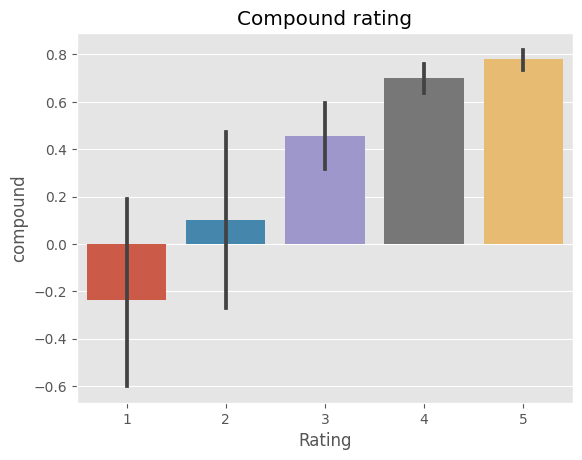

In [156]:
ax = sns.barplot(data = vaders, x= 'Rating', y = 'compound')
ax.set_title('Compound rating')
plt.show()

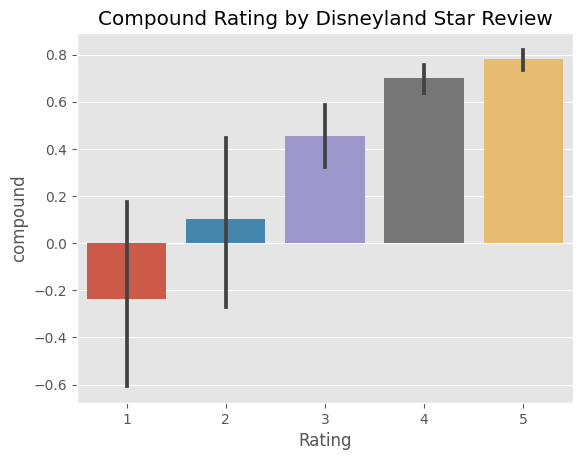

In [191]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Rating by Disneyland Star Review')
plt.show()

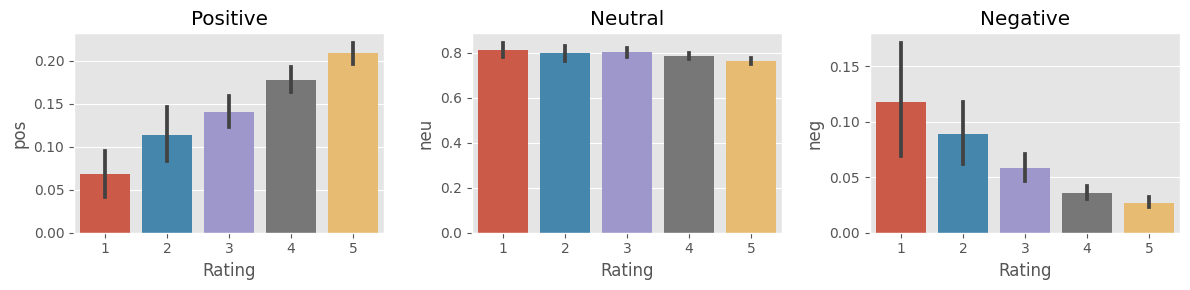

In [159]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [160]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [161]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [162]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Good to see while here, but very small. Great if we brought the children, but not for adults who have been to other ones. Not exciting for bigger children either.


{'neg': 0.089, 'neu': 0.702, 'pos': 0.208, 'compound': 0.6783}

In [163]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.12968306, 'roberta_neu': 0.32160297, 'roberta_pos': 0.548714}


In [164]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [165]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review_Text']
        myid = row['Review_ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 668777351
Broke for id 641689558


In [166]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Review_ID'})
results_df = results_df.merge(df, how='left')

In [167]:
results_df.columns

Index(['Review_ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Rating', 'Year_Month',
       'Reviewer_Location', 'Review_Text', 'Branch'],
      dtype='object')

## Comparing on plot

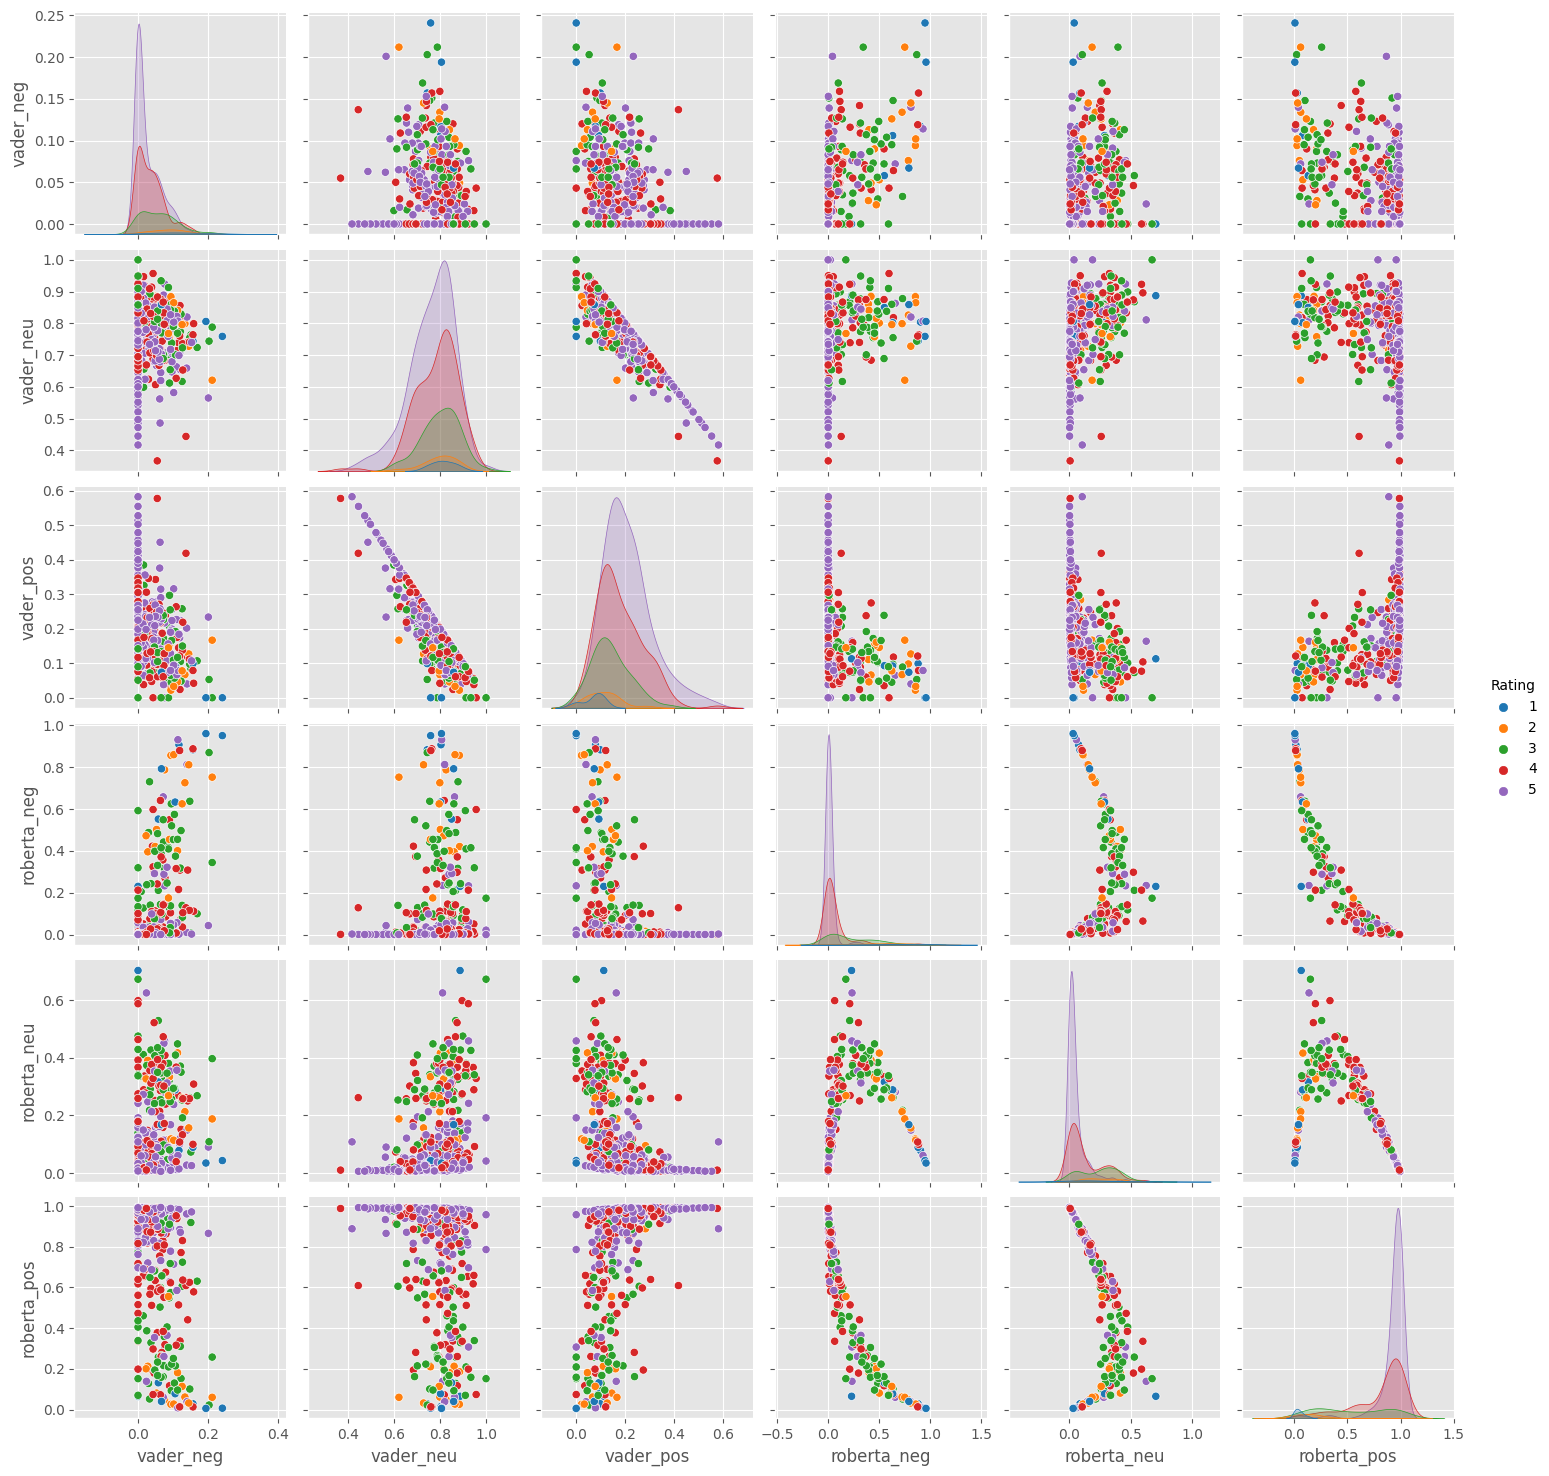

In [170]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [185]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review_Text'].values[0]

"I'm writing an honest and truthful opinion of this park. I'm not paid by anybody to discredit Disney. If you in HK, do not go to this rip off expensive overpriced park, which is not even worth HK$10 let alone paying over HK$400. There's no attraction, the rides are garbage, no decent food court and the price of the food is three to four time the price. this theme park is just as big as the Victoria Park in HK.Those who are commenting about how wonderful the time they had must have been paid by Disney or high with something. I would rather go to Ocean park which is much bigger and more things to see and do.Just to get to Disneyland you are paying US$ 15 20."

In [186]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review_Text'].values[0]

'The main attractions were shut while we still paid the full entrance fees, without any intimation either online or as the ticket kiosks'

# Negative sentiment 5-Star review

In [187]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review_Text'].values[0]

'A pain. Over expensive. Over cheesy, touristic rip off in one centre. Felt like my entire life   s savings were being squeezed out of me. Ok for the kids but even they got bored of stuff too quickly. Needs rethinking'

In [188]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review_Text'].values[0]

'Magical, fun time at Disneyland. We had 2 wonderful days here. All staff make the visit extra special as they are so kind and patient.  Unfortunately we were disappointed to find the fireworks were cancelled both nights we were there. No warning or explanation.'

# The Transformers Pipeline

In [189]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\transformers\image_utils.py:222: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  def resize(self, image, size, resample=PIL.Image.BILINEAR, default_to_square=True, max_size=None):
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [190]:
sent_pipeline('I love Disneyland!')

[{'label': 'POSITIVE', 'score': 0.9998539686203003}]